# Case study: Hollow plate RVE 
## Problem definition
In this part, we are trying to show how the developed RVE simulator works by a simple RVE case called hollow plate RVE. 

> The shematic of the RVE is given by 

<center><img src="illustration.png" width="300"></center>

<center> Fig.schematics of the hollow plate RVE  </center>

<br />

> **Geometry parameters to describe the RVE**
1. length: $L$, width: $W$. Usually, $L=W$; therefore, we only use one parameter (size) to define the shape of RVE 
2. radius: $R$, which is the radius of the plate inside the square 

> **Other parameters for simulation** 
1. Material parameters: 
- Young;s modulus, the default value is $100 \mathrm{Mpa}$
- Poission ratio , the default value is $0.3$ 

2. Loading: 
- $ [ E_{xx}, E_{yy}, E_{xy} ]$ 

3. Mesh:
- mesh portion: divisions of every edges when meshing 

# Realization

In [1]:
# import needed libraries
import sys
from collections import OrderedDict

from matplotlib import pyplot as plt

# path of local project
folder_path = "/home/jiaxiangyi/Documents/rvesimulator"
sys.path.insert(0, folder_path)

from simulator_caller import SimulatorCaller

from rvesimulator.design_of_experiment.samplers import RandomSampler

In [2]:
# create the doe
# define the design space
doe_variables = OrderedDict({"radius": [0.10, 0.40], "size": [1.0, 1.5]})
# define number of samples
num_points = 3
# define the information of outputs
name_outputs = ["PK2", "Green_strain"]
doe_sampler = RandomSampler()
doe_sampler.sampling(
    num_samples=num_points,
    design_space=doe_variables,
    out_names=name_outputs,
    seed=123456,
)

print(doe_sampler.data['samples']) 
print(doe_sampler.data['responses'])

     radius      size
0  0.138091  1.483359
1  0.178143  1.448618
2  0.213025  1.168111
   PK2 Green_strain
0  NaN          NaN
1  NaN          NaN
2  NaN          NaN


In [3]:
# initialize the abaqus simulator
simulation_wrapper = SimulatorCaller()
# print the default simulaton information of the RVE 
simulation_wrapper.update_sim_info(print_info=True)

The simulation information is : {'job_name': 'HollowPlateRVE', 'radius': 0.2, 'size': 1.0, 'youngs_modulus': 100.0, 'poission_ratio': 0.3, 'mesh_portion': 30, 'loads': [0.1, 0.0, 0.0]}
The simulation information is : {'job_name': 'HollowPlateRVE', 'radius': 0.2, 'size': 1.0, 'youngs_modulus': 100.0, 'poission_ratio': 0.3, 'mesh_portion': 30, 'loads': [0.1, 0.0, 0.0]}


In [4]:
# update some information as you wish 
simulation_wrapper.update_sim_info(loads=[0.2, 0.05, 0.05], print_info=True) 


The simulation information is : {'job_name': 'HollowPlateRVE', 'radius': 0.2, 'size': 1.0, 'youngs_modulus': 100.0, 'poission_ratio': 0.3, 'mesh_portion': 30, 'loads': [0.2, 0.05, 0.05]}


In [5]:
# run the simulation 
data = simulation_wrapper.run_simulation(data=doe_sampler.data)
print(data)

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/hollow_plate_simulation/Data/point_0
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<24 out of 30 licenses remain available>.


Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 40.0781455039978
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<24 out of 30 licenses remain available>.


Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/hollow_plate_simulation/Data/point_1
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<24 out of 30 licenses remain available>.


Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 40.089853286743164
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<24 out of 30 licenses remain available>.


Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/hollow_plate_simulation/Data/point_2
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<24 out of 30 licenses remain available>.


Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 40.08501195907593
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<24 out of 30 licenses remain available>.


{'samples':      radius      size
0  0.138091  1.483359
1  0.178143  1.448618
2  0.213025  1.168111, 'responses':                                                  PK2  \
0  [[[0.0, 0.0], [0.0, 0.0]], [[2.743545901882581...   
1  [[[0.0, 0.0], [0.0, 0.0]], [[2.628595219418994...   
2  [[[0.0, 0.0], [0.0, 0.0]], [[2.359207060740015...   

                                        Green_strain  
0  [[[0.0, 0.0], [0.0, 0.0]], [[0.020212499543465...  
1  [[[0.0, 0.0], [0.0, 0.0]], [[0.020212499543465...  
2  [[[0.0, 0.0], [0.0, 0.0]], [[0.020212499543465...  }


In [6]:
# print the data set after simulation
print(data)

{'samples':      radius      size
0  0.138091  1.483359
1  0.178143  1.448618
2  0.213025  1.168111, 'responses':                                                  PK2  \
0  [[[0.0, 0.0], [0.0, 0.0]], [[2.743545901882581...   
1  [[[0.0, 0.0], [0.0, 0.0]], [[2.628595219418994...   
2  [[[0.0, 0.0], [0.0, 0.0]], [[2.359207060740015...   

                                        Green_strain  
0  [[[0.0, 0.0], [0.0, 0.0]], [[0.020212499543465...  
1  [[[0.0, 0.0], [0.0, 0.0]], [[0.020212499543465...  
2  [[[0.0, 0.0], [0.0, 0.0]], [[0.020212499543465...  }


Text(0.5, 0.98, 'simulation results')

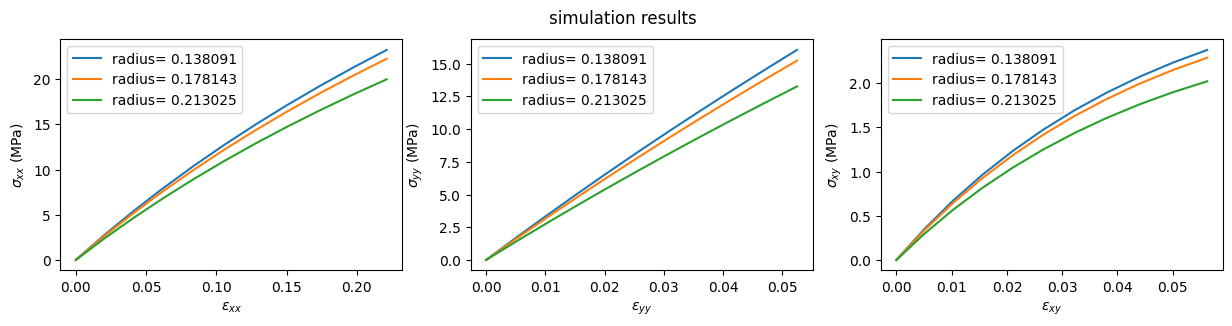

In [7]:
samples = data["samples"]
respones = data["responses"]
# define parameter of plot figures
%matplotlib inline

# with plt.style.context(["science", "ieee"]):
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
pparam = dict(xlabel="$\epsilon_{xx}$", ylabel="$\sigma_{xx}$ (MPa)")
ax[0].plot(
    respones["Green_strain"][0][:, 0, 0],
    respones["PK2"][0][:, 0, 0],
    label=f'radius= {samples["radius"][0]:3f}',
)
ax[0].plot(
    respones["Green_strain"][1][:, 0, 0],
    respones["PK2"][1][:, 0, 0],
    label=f'radius= {samples["radius"][1]:3f}',
)
ax[0].plot(
    respones["Green_strain"][2][:, 0, 0],
    respones["PK2"][2][:, 0, 0],
    label=f'radius= {samples["radius"][2]:3f}',
)
ax[0].legend()
ax[0].set(**pparam)

pparam = dict(xlabel="$\epsilon_{yy}$", ylabel="$\sigma_{yy}$ (MPa)")
ax[1].plot(
    respones["Green_strain"][0][:, 1, 1],
    respones["PK2"][0][:, 1, 1],
    label=f'radius= {samples["radius"][0]:3f}',
)
ax[1].plot(
    respones["Green_strain"][1][:, 1, 1],
    respones["PK2"][1][:, 1, 1],
    label=f'radius= {samples["radius"][1]:3f}',
)
ax[1].plot(
    respones["Green_strain"][2][:, 1, 1],
    respones["PK2"][2][:, 1, 1],
    label=f'radius= {samples["radius"][2]:3f}',
)
ax[1].legend()
ax[1].set(**pparam)

pparam = dict(xlabel="$\epsilon_{xy}$", ylabel="$\sigma_{xy}$ (MPa)")
ax[2].plot(
    respones["Green_strain"][0][:, 1, 0],
    respones["PK2"][0][:, 1, 0],
    label=f'radius= {samples["radius"][0]:2f}',
)
ax[2].plot(
    respones["Green_strain"][1][:, 1, 0],
    respones["PK2"][1][:, 1, 0],
    label=f'radius= {samples["radius"][1]:2f}',
)
ax[2].plot(
    respones["Green_strain"][2][:, 1, 0],
    respones["PK2"][2][:, 1, 0],
    label=f'radius= {samples["radius"][2]:2f}',
)
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('simulation results')